<a href="https://colab.research.google.com/github/Neix20/Deep_Learning_May_2021/blob/main/Tan_Xi_En.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# cd /content/drive/MyDrive/Deep_Learning_Assignment_May_2021/Deep_Learning_May_2021

/content/drive/MyDrive/Deep_Learning_Assignment_May_2021/Deep_Learning_May_2021


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Dataset

# Fashion Dataset

In [ ]:
class FashionMNIST(Dataset):
    
    def __init__(self, root = ".", train = True, download=False, transform=None):
        self.classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
        self.num_classes = len(self.classes)          
        self.__transform = transform        
        self.__images  = []
        self.__targets = []

        dataset = torchvision.datasets.FashionMNIST(root=root, train=train, download=download)

        self.__images = dataset.data
        self.__targets = dataset.targets
			
        self.__targets  = np.array(self.__targets, dtype=np.int64)     
                       
    def __len__(self):
        return len(self.__images)
    
    def __getitem__(self, idx):
        
        img   = self.__images[idx]
        label = self.__targets[idx]

        if self.__transform:
            img = self.__transform(img)
            
        return img, label

## Fetch Dataset

In [ ]:
dataset = FashionMNIST(root=".", download= True)


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Understand Dataset

In [ ]:
print("Number of records: ", len(dataset))
print("Dataset Type: ", type(dataset))
print("Classes: ", dataset.classes)
print("Number of Classes: ", len(dataset.classes))

Number of records:  60000
Dataset Type:  <class '__main__.FashionMNIST'>
Classes:  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Number of Classes:  10


## Show Image

In [ ]:
def show_image(img):
    plt.imshow (img, cmap = matplotlib.cm.gray, interpolation = 'nearest')

In [39]:
idx = 10
img, label = dataset[idx]

print('\nType of img:', type(img))
print('Type of items in img:', img.dtype)

print('Shape of img:', img.shape)
print('Range of img:', img.min(), 'to', img.max())

print("Labels: ", label)


Type of img: <class 'torch.Tensor'>
Type of items in img: torch.float32
Shape of img: torch.Size([1, 28, 28])
Range of img: tensor(-0.5000) to tensor(0.5000)
Labels:  0


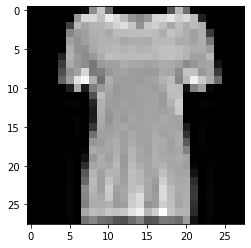

In [ ]:
show_image(img)

# TorchVision Transformations

In [ ]:
from torchvision import transforms

## Transformation Pipeline

In [ ]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])

In [ ]:
idx = 10
img, label = dataset[idx]

print('Original image shape:', img.shape)
print(f'Range of pixel values: {img.min():d}-{img.max():d}')

Original image shape: torch.Size([28, 28])
Range of pixel values: 0-255


In [ ]:
img = transform(img)

print('Shape of img:', img.shape)
print(f'Range of img: {img.min().item():.2f} to {img.max().item():.2f}')
print('Type of img:', type(img))
print('Type of items in img:', img.dtype)

Shape of img: torch.Size([1, 28, 28])
Range of img: -0.50 to 0.50
Type of img: <class 'torch.Tensor'>
Type of items in img: torch.float32


## Transform Dataset using pipeline

In [40]:
dataset = FashionMNIST(root=".", transform = transform,  download= True)

In [42]:
idx = 10
img, label = dataset[idx]

print('Original image shape:', img.shape)
print(f'Range of pixel values: {img.min():.2f}-{img.max():.2f}')
print('Type of img:', type(img))
print('Type of items in img:', img.dtype)
print("Labels: ", label)

Original image shape: torch.Size([1, 28, 28])
Range of pixel values: -0.50-0.50
Type of img: <class 'torch.Tensor'>
Type of items in img: torch.float32
Labels:  0


## Train Test Split

In [ ]:
import torch
from torch.utils.data import DataLoader

In [ ]:
trainset, testset = torch.utils.data.random_split(dataset, [50000, 10000])

# Batch Loader

In [ ]:
trainloader = DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)
testloader = DataLoader(testset, batch_size = 4, shuffle = True, num_workers = 2)

In [44]:
dataiter = iter(trainloader)
imgs, labels = dataiter.next()

print('Shape of imgs:', imgs.shape)
print('Shape of labels:', labels.shape)

Shape of imgs: torch.Size([4, 1, 28, 28])
Shape of labels: torch.Size([4])


# Building Regular Neural Network

In [ ]:
import torch.nn as nn
from torchsummary import summary
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
      super().__init__()
      self.fc1 = nn.Linear(1 * 28 * 28, 50)
      self.relu1 = nn.ReLU()
      self.fc2 = nn.Linear(50, 10)
  
  def forward(self, x):
    # flatten each image
    x = x.view(x.size(0), -1)

    # forward propagation for layer 1
    x = self.fc1(x)
    x = self.relu1(x)

    # forward propagation for layer 2
    x = self.fc2(x)

    return x

In [ ]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [ ]:
summary(net, input_size = (1, 28, 28), batch_size = 4, device = "cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [4, 50]          39,250
              ReLU-2                    [4, 50]               0
            Linear-3                    [4, 10]             510
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 0.15
Estimated Total Size (MB): 0.17
----------------------------------------------------------------


# Training Model

In [ ]:
net = Net()
if torch.cuda.is_available():
  net = net.cuda()

## Optimizer

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.001)

## Loss Function

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
net.train()

Net(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [ ]:
num_epochs = 3
loop_per_val = 1000

for e in range(num_epochs):

    running_loss = 0
    running_count = 0

    for i, (inputs, labels) in enumerate(trainloader):

        # transfer input to GPU
        if torch.cuda.is_available():
          inputs = inputs.cuda()
          labels = labels.cuda()

        # set grad to zero
        net.zero_grad()

        # forward propagation
        outputs = net(inputs)

        # compute loss
        loss = criterion(outputs, labels)

        # backward propagation
        loss.backward()

        # update model
        optimizer.step()

        # compute running loss and validation
        running_loss += loss.item()
        running_count +=1

        # display the averaged loss value 
        if i % loop_per_val == loop_per_val - 1:              
            train_loss = running_loss / loop_per_val
            running_loss = 0. 
            running_count = 0
            print(f'[Epoch {e+1:2d}/{num_epochs:d} Iter {i+1:5d}/{len(trainloader)}]: train_loss = {train_loss:.4f}')

[Epoch  1/3 Iter  1000/12500]: train_loss = 2.0903
[Epoch  1/3 Iter  2000/12500]: train_loss = 1.6551
[Epoch  1/3 Iter  3000/12500]: train_loss = 1.2921
[Epoch  1/3 Iter  4000/12500]: train_loss = 1.1120
[Epoch  1/3 Iter  5000/12500]: train_loss = 0.9671
[Epoch  1/3 Iter  6000/12500]: train_loss = 0.8887
[Epoch  1/3 Iter  7000/12500]: train_loss = 0.8133
[Epoch  1/3 Iter  8000/12500]: train_loss = 0.7717
[Epoch  1/3 Iter  9000/12500]: train_loss = 0.7622
[Epoch  1/3 Iter 10000/12500]: train_loss = 0.7274
[Epoch  1/3 Iter 11000/12500]: train_loss = 0.6969
[Epoch  1/3 Iter 12000/12500]: train_loss = 0.7264
[Epoch  2/3 Iter  1000/12500]: train_loss = 0.6491
[Epoch  2/3 Iter  2000/12500]: train_loss = 0.6320
[Epoch  2/3 Iter  3000/12500]: train_loss = 0.6288
[Epoch  2/3 Iter  4000/12500]: train_loss = 0.6222
[Epoch  2/3 Iter  5000/12500]: train_loss = 0.6210
[Epoch  2/3 Iter  6000/12500]: train_loss = 0.6135
[Epoch  2/3 Iter  7000/12500]: train_loss = 0.6129
[Epoch  2/3 Iter  8000/12500]: 

# Testing Model

## Evaluate Model

In [ ]:
net.eval()

Net(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

## Accuracy Score

In [72]:
# running_correct to accumulate number of correct predictions
running_corrects = 0

y_true, y_pred = np.array([]), np.array([])
# for ...
for inputs, labels in testloader:
    # transfer to GPU
    if torch.cuda.is_available():
      inputs = inputs.cuda()
      labels = labels.cuda()
    
    # do not want to compute the gradient
    with torch.no_grad():
        # forward propagation to get class scores
        scores = net(inputs)
        
        # get the predicted class
        _, preds = torch.max(scores, 1)
        y_true = np.concatenate((y_true, labels.cpu().numpy()))
        y_pred = np.concatenate((y_pred, preds.cpu().numpy()))

        # compute the running correct
        running_corrects += (preds == labels).double().sum()

# accuracy = ...
accuracy = running_corrects / len(testloader.dataset) * 100
print(f'Accuracy = {accuracy:.2f}%')

Accuracy = 81.66%


## Classification Report 

In [74]:
from sklearn.metrics import classification_report
import pandas as pd
display(pd.DataFrame(classification_report(y_true, y_pred, target_names = dataset.classes, output_dict = True)).transpose())

,precision,recall,f1-score,support
T-shirt/top,0.826788,0.778199,0.801758,1055.0000
Trouser,0.966908,0.942540,0.954569,992.0000
Pullover,0.696942,0.740918,0.718258,1046.0000
Dress,0.774623,0.884498,0.825922,987.0000
Coat,0.744835,0.697967,0.720640,1033.0000
Sandal,0.885593,0.860082,0.872651,972.0000
Shirt,0.596916,0.563410,0.579679,962.0000
Sneaker,0.836147,0.868937,0.852227,969.0000
Bag,0.940933,0.920892,0.930805,986.0000
Ankle boot,0.904856,0.914830,0.909816,998.0000


## Confusion matrix

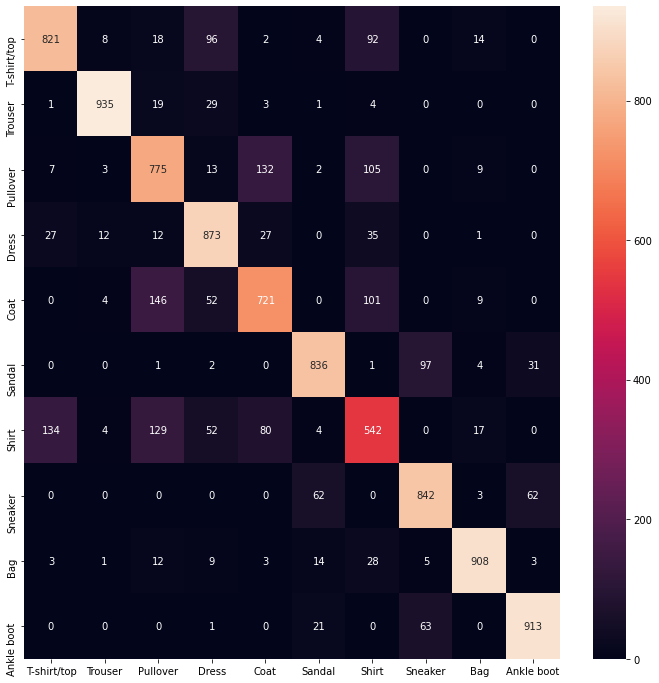

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, y_pred), index = dataset.classes, columns = dataset.classes)
fig = plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix_df,annot=True, fmt='g')
plt.show()

# Classifying An Image

In [ ]:
idx = 10
img, label = dataset[idx]

print('\nType of img:', type(img))
print('Type of items in img:', img.dtype)

print('Shape of img:', img.shape)
print('Range of img:', img.min(), 'to', img.max())


Type of img: <class 'torch.Tensor'>
Type of items in img: torch.float32
Shape of img: torch.Size([1, 28, 28])
Range of img: tensor(-0.5000) to tensor(0.5000)


## Load own test Image

In [ ]:
from PIL import Image

test_img = Image.open("idk.jpg").convert('L')

# Resize Image
test_img = test_img.resize((28, 28))

# Convert PIL image to numpy array
test_img = np.array(test_img)

show_image(test_img)

FileNotFoundError: ignored

In [ ]:
test_img = transform(test_img)

print('Shape of img:', test_img.shape)
print(f'Range of img: {test_img.min().item():.2f} to {test_img.max().item():.2f}')
print('Type of img:', type(test_img))
print('Type of items in img:', test_img.dtype)

In [ ]:
inputs = test_img
if torch.cuda.is_available():
  inputs = inputs.cuda()

with torch.no_grad():
  scores = net(inputs)
  _, preds = torch.max(scores, 1)
  print(dataset.classes[preds])